In [52]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
from sklearn import metrics

In [53]:
df = pd.read_csv('coherencia_class.csv')

In [54]:
#variable a predecir
y = df['coherencia_cat']
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)
#variables independientes
X = df.drop(['coherencia_cat'], axis=1)



<AxesSubplot: xlabel='coherencia_cat', ylabel='Count'>

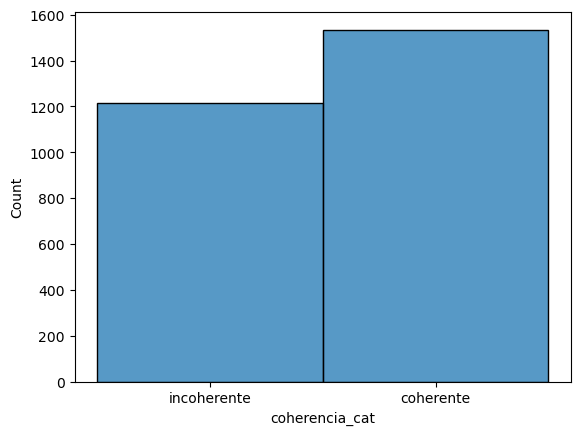

In [55]:
sns.histplot(df['coherencia_cat'])

In [112]:

#Dividir entre sets de entrenamiento y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 20)

#weights = compute_sample_weight(class_weight='balanced', y = y_train)

# Entrenar el modelo
model = xgb.XGBClassifier(eta = 0.3, max_depth = 10, objective= 'binary:logistic')
model.fit(X_train, y_train)#sample_weight = weights)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5774818401937046


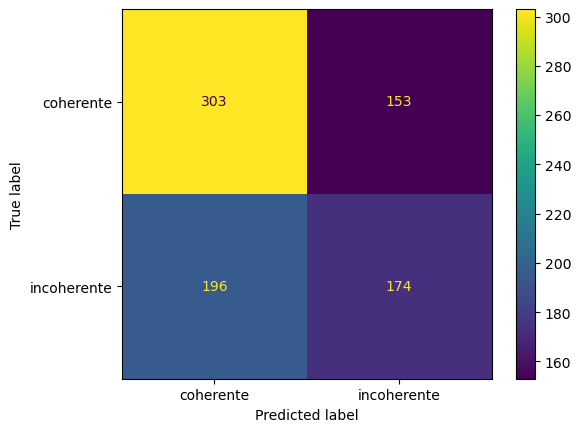

In [113]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels= ['coherente','incoherente'])
disp.plot()
plt.show()

In [107]:
importance = model.get_booster().get_score(importance_type= 'gain')
importance = pd.DataFrame.from_dict(importance, orient= 'index', columns = ['feature_importance'])

C:\Users\vaorc\AppData\Local\Temp\ipykernel_22844\1043148355.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  importance.sort_values('feature_importance').plot(kind = 'barh', sort_columns = True, ax=ax)


<AxesSubplot: >

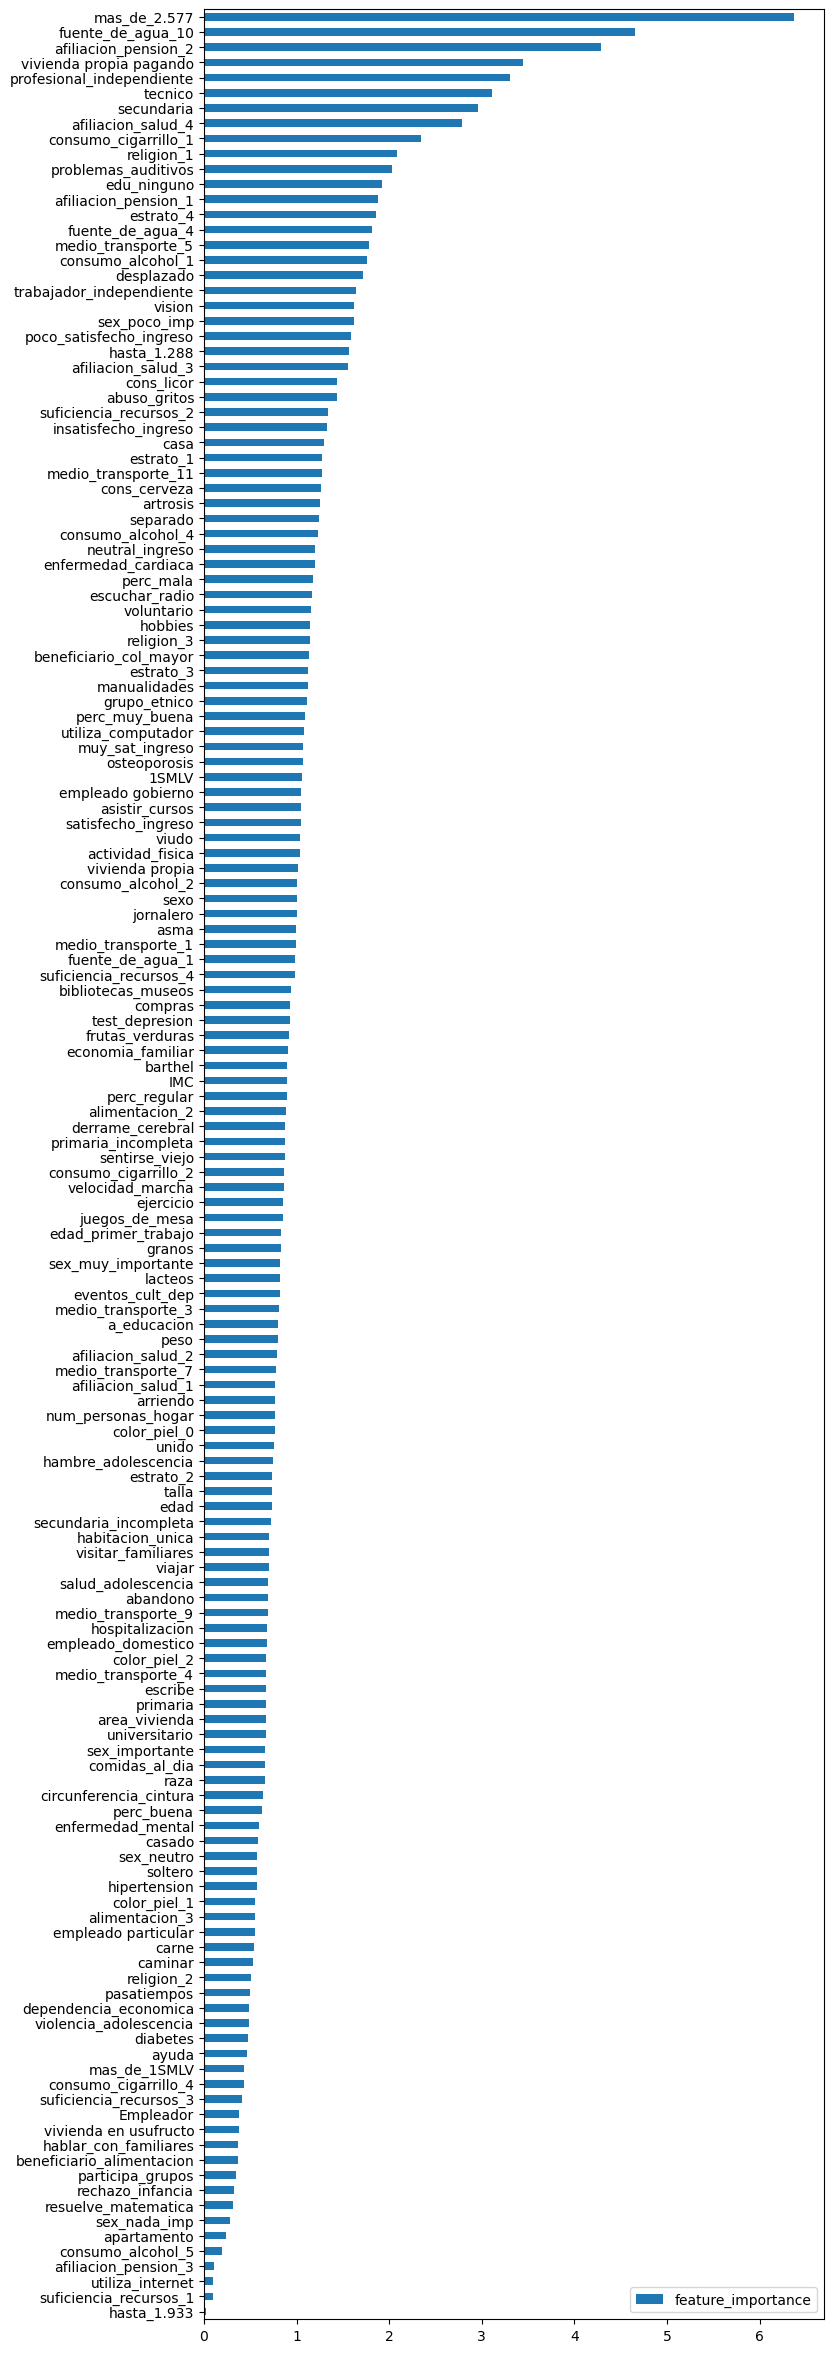

In [108]:
figure, ax = plt.subplots(figsize=(8,30))
importance.sort_values('feature_importance').plot(kind = 'barh', sort_columns = True, ax=ax)

In [ ]:
probabilities = model.predict_proba(X, ntree_limit=None, validate_features=True, base_margin=None, iteration_range=None)

In [ ]:
probabilities = pd.DataFrame(data= probabilities, columns= ['coherente','subestima','sobre estima'])

In [ ]:
for col in df.columns:
    print(f'{col}')

area_vivienda
sexo
edad
num_personas_hogar
grupo_etnico
raza
a_educacion
edad_primer_trabajo
dependencia_economica
habitacion_unica
utiliza_computador
utiliza_internet
sentirse_viejo
escribe
resuelve_matematica
pasatiempos
escuchar_radio
ver_television
juegos_de_mesa
manualidades
hablar_con_familiares
visitar_familiares
actividad_fisica
asistir_cursos
hobbies
compras
bibliotecas_museos
eventos_cult_dep
viajar
participa_grupos
beneficiario_alimentacion
beneficiario_col_mayor
desplazado
comidas_al_dia
lacteos
granos
carne
frutas_verduras
cons_vino
cons_cerveza
cons_licor
ejercicio
caminar
economia_familiar
salud_adolescencia
hambre_adolescencia
violencia_adolescencia
vision
problemas_auditivos
rechazo_infancia
abuso_gritos
abuso_maltrato_fisico
abuso_agresion
abandono
abuso_economico
hipertension
diabetes
cancer
asma
enfermedad_cardiaca
derrame_cerebral
artrosis
osteoporosis
enfermedad_mental
hospitalizacion
peso
talla
circunferencia_cintura
IMC
velocidad_marcha
test_depresion
tiene_depr